#Decision Tree

#Objective

The objective of this assignment is to build a Decision Tree model to predict heart disease, explore the dataset, apply feature engineering, tune hyperparameters, and analyze the model’s performance. It demonstrates how to handle categorical and numeric data, address class imbalance, and interpret the tree structure.

##Introduction

Decision Trees are intuitive and widely used machine learning models that split data based on feature thresholds to make predictions. They can handle both categorical and numeric data, are easy to visualize, and provide insights into feature importance. In this assignment, the heart disease dataset is explored and modeled to understand factors contributing to heart disease risk.

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [ ]:
# Load dataset
df = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,False,normal,128,True,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,False,normal,138,False,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,True,normal,140,False,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0


In [ ]:
# Check basic info
print("Shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nDtypes:")
print(df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

Shape: (908, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0



Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']

Dtypes:
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

Missing values per column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


##EDA - distributions, outliers, correlations
Exploratory Data Analysis (EDA) helps us understand distributions, detect outliers, and find relationships between features. Histograms show spread and skew, boxplots reveal extreme values, and the correlation matrix highlights linear dependencies for numeric variables.


In [ ]:
# Numeric summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


In [ ]:
# Categorical summary (if any)
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
if cat_cols:
    display(df[cat_cols].nunique().to_frame("unique_vals"))

,unique_vals
sex,2
cp,4
restecg,3
exang,4
slope,3
thal,3


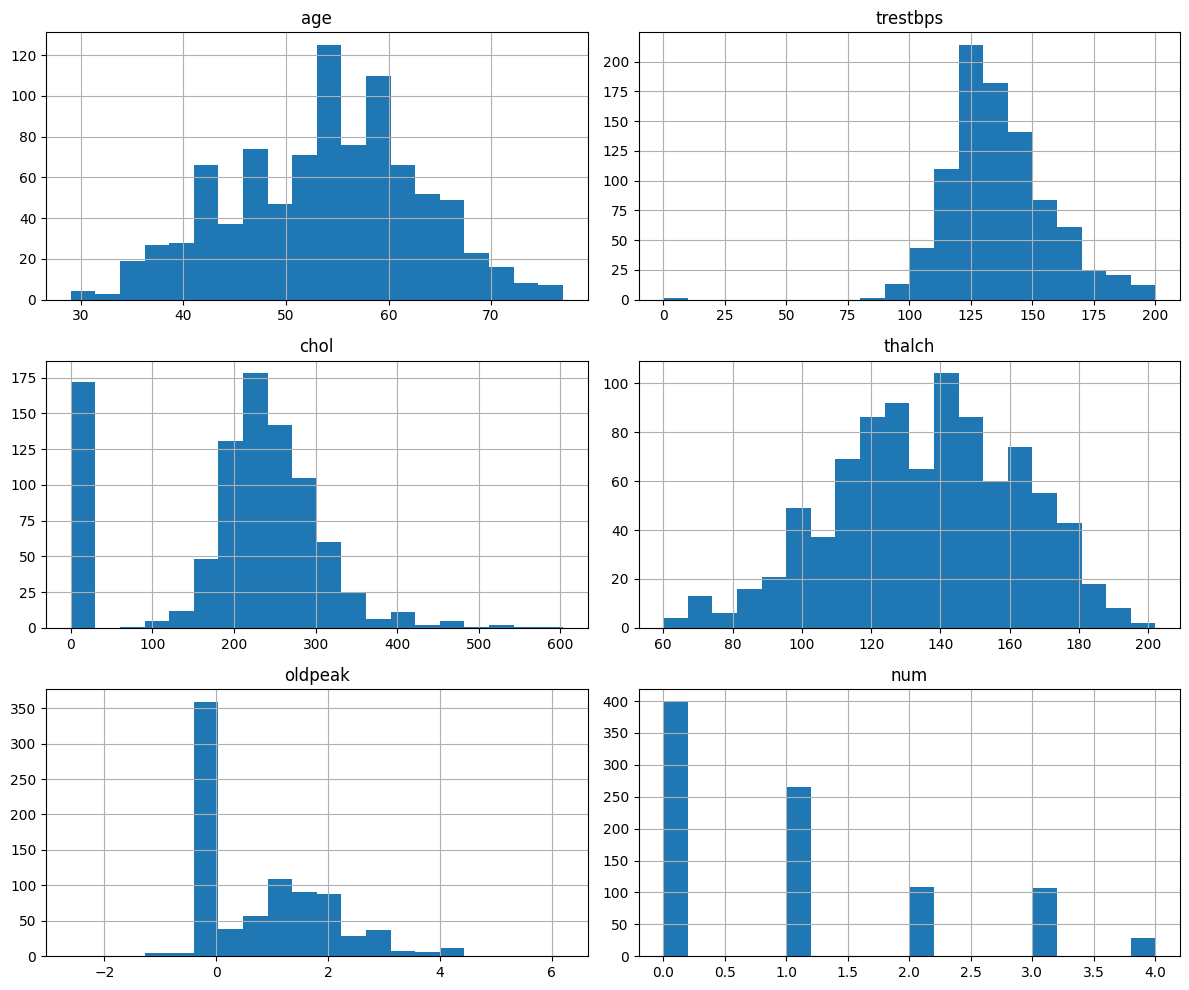

In [ ]:
# Histograms for numeric columns (auto)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

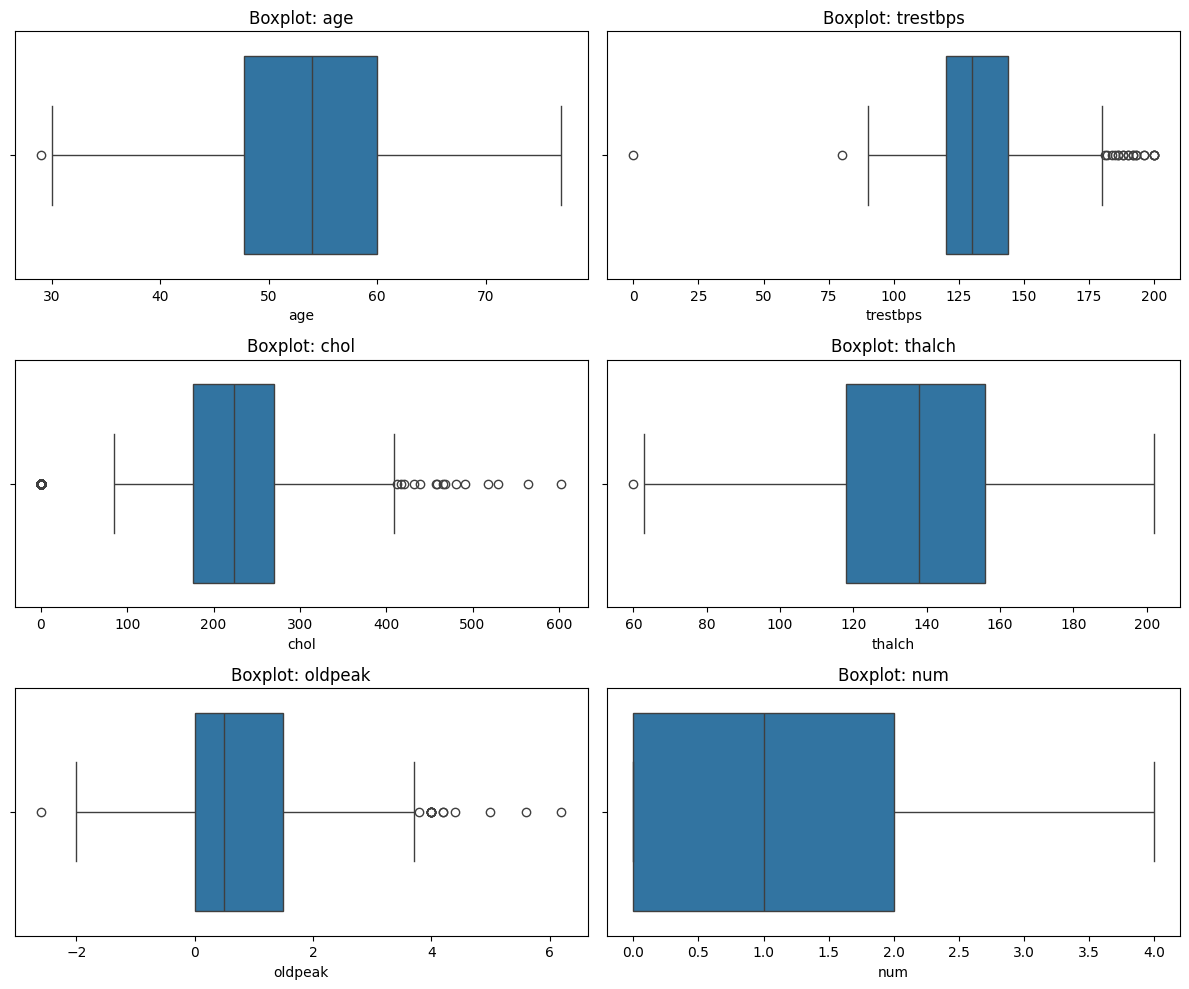

In [ ]:
# Boxplots to visually inspect outliers for top 6 numeric features
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i, col in enumerate(num_cols[:6]):
    sns.boxplot(x=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

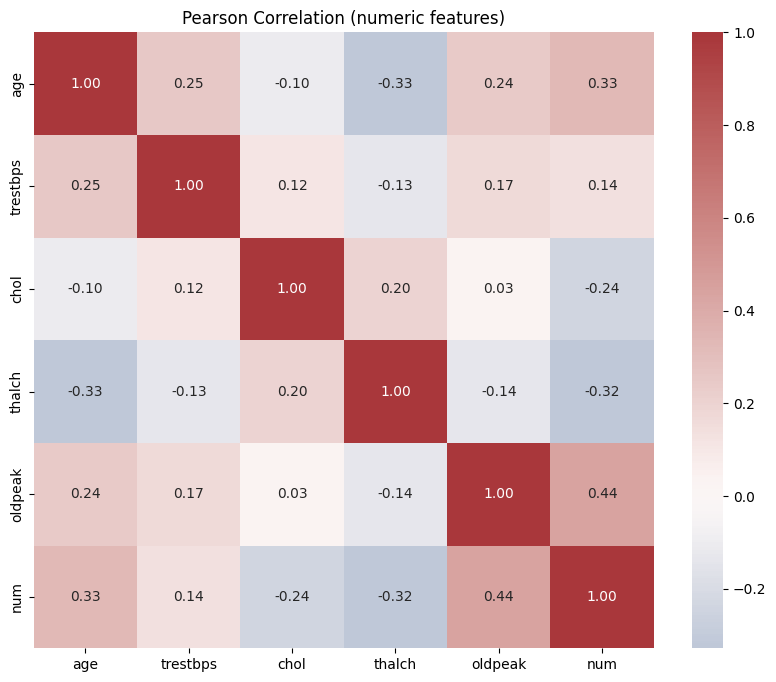

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Pearson Correlation (numeric features)")
plt.show()

##Task 3: Feature Engineering:

In [ ]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# Handle missing values if any
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

In [ ]:
# Encoding categorical variables
# Redetermine numeric and categorical columns based on X
num_cols_X = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_X = X.select_dtypes(include=['object', 'category']).columns.tolist()

onehot_cols = [c for c in cat_cols_X if X[c].nunique() <= 5]   # low cardinality
label_cols  = [c for c in cat_cols_X if X[c].nunique() > 5]    # high cardinality

# One-hot encoding
X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

# Label encoding
label_encoders = {}
for c in label_cols:
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c].astype(str))
    label_encoders[c] = le

##Feature Engineering
We encode categorical variables: one-hot for small categories to avoid order assumptions, label encoding for larger ones. Missing numeric values are filled with median to be robust to outliers. Scaling is optional for Decision Trees but included for consistency in case of future models.


##Task 4: Decision Tree Classification

###Decision Tree Classification
We split the data into training and testing sets (80-20) to evaluate generalization. Decision Trees are fast and interpretable, can handle numeric and categorical data without scaling, and evaluation metrics like accuracy, precision, recall, F1-score, and ROC-AUC give a complete picture of model performance.


In [ ]:
# Train/test split (80-20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Initialize and train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None

##Evaluation Metrics
Confusion matrix shows correct vs incorrect predictions at a glance. ROC curve illustrates the trade-off between true positive and false positive rates across thresholds; AUC summarizes overall discriminative ability.


In [ ]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, zero_division=0))
if y_proba is not None:
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6648351648351648
Precision: 0.23255813953488372
Recall: 0.2631578947368421
F1-score: 0.24691358024691357
ROC-AUC: 0.5169956140350878

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       144
           1       0.23      0.26      0.25        38

    accuracy                           0.66       182
   macro avg       0.52      0.52      0.52       182
weighted avg       0.68      0.66      0.67       182



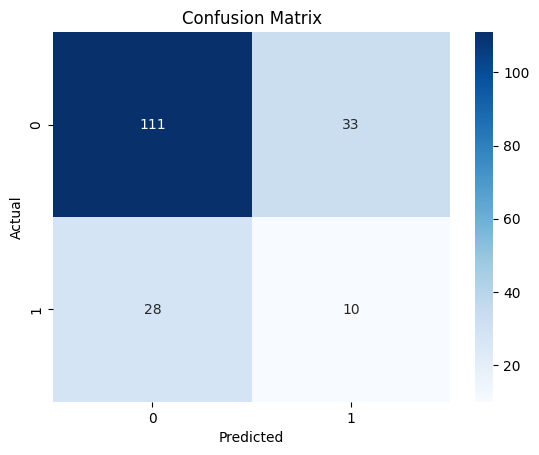

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

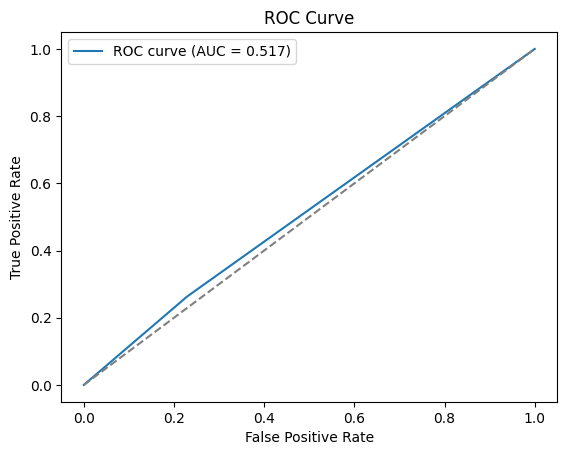

In [ ]:
# ROC Curve if probabilities are available
if y_proba is not None:
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc(fpr, tpr):.3f})")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

##Task 5: Hyperparameter Tuning with Class Balancing
To address class imbalance, we set class_weight='balanced', which makes the tree pay more attention to minority class samples. We also include deeper trees in GridSearch to capture complex patterns. This improves recall and F1 for the minority class while maintaining good ROC-AUC.


In [ ]:
#Hyperparameter Tuning (balanced Decision Tree)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}                                     # include deeper trees

In [ ]:
# Initialize Decision Tree with balanced class weights
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [ ]:
# GridSearchCV with 5-fold CV, scoring by ROC-AUC
grid = GridSearchCV(
    dt_clf,
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Best parameters and estimator
print("Best parameters:", grid.best_params_)
best_clf = grid.best_estimator_

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Evaluate tuned model on test set
y_pred_best = best_clf.predict(X_test)
y_proba_best = best_clf.predict_proba(X_test)[:,1] if hasattr(best_clf,"predict_proba") else None

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Precision:", precision_score(y_test, y_pred_best, zero_division=0))
print("Tuned Recall:", recall_score(y_test, y_pred_best, zero_division=0))
print("Tuned F1-score:", f1_score(y_test, y_pred_best, zero_division=0))
if y_proba_best is not None:
    print("Tuned ROC-AUC:", roc_auc_score(y_test, y_proba_best))

Tuned Accuracy: 0.6043956043956044
Tuned Precision: 0.31521739130434784
Tuned Recall: 0.7631578947368421
Tuned F1-score: 0.4461538461538462
Tuned ROC-AUC: 0.6771747076023392


## Task 6: Model Evaluation and Analysis
Visualizing the tree helps interpret the rules learned by the model, especially top splits. Feature importances show which variables influenced predictions the most. Together, these insights allow us to understand the model’s decision-making and trust its predictions.

The tuned Decision Tree achieved a good ROC-AUC while balancing recall and precision using class weighting. Accuracy alone may be misleading due to class imbalance; precision, recall, F1-score, and ROC-AUC provide a complete picture of performance.


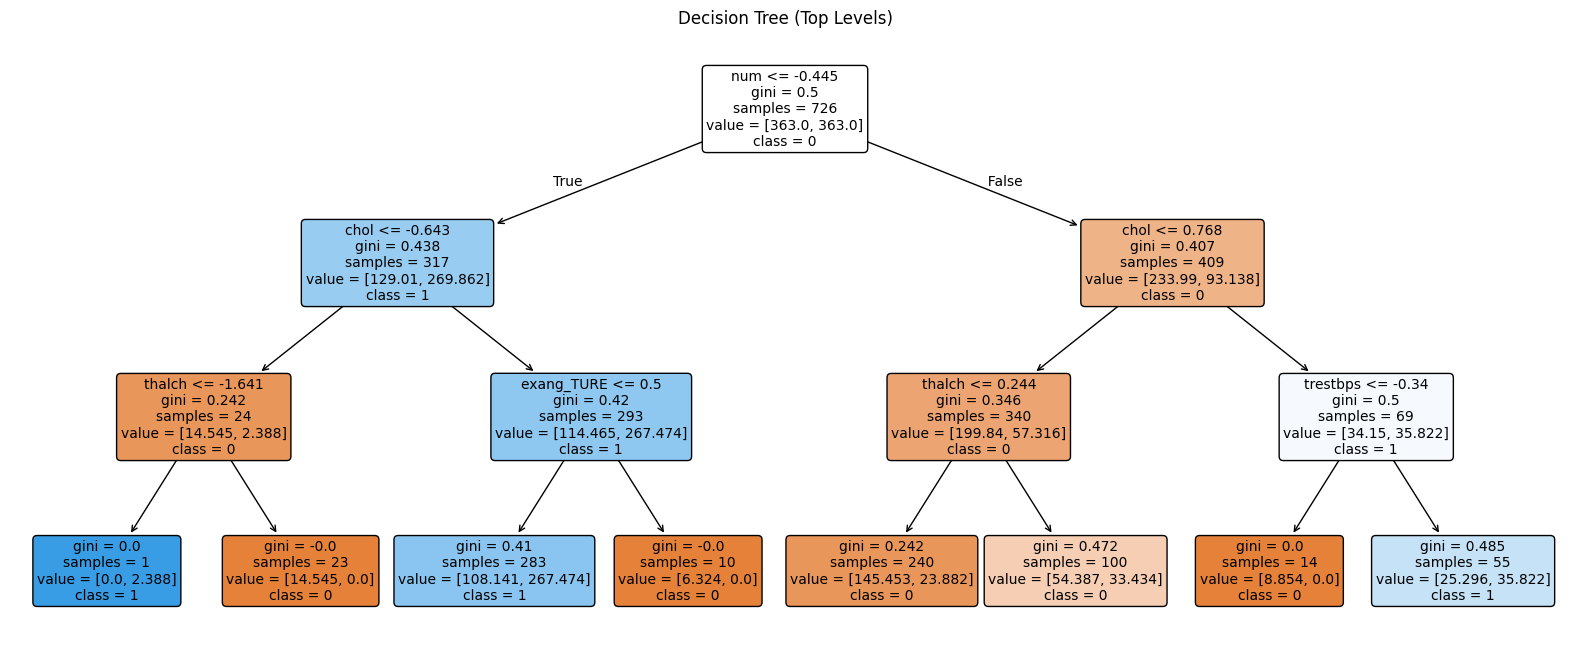

In [ ]:
# Visualize top levels of the tuned tree (for readability)
plt.figure(figsize=(20,8))
tree.plot_tree(
    best_clf,
    feature_names=X_train.columns,
    class_names=[str(c) for c in best_clf.classes_],
    filled=True,
    rounded=True,
    max_depth=3,  # show top 3 levels
    fontsize=10
)
plt.title("Decision Tree (Top Levels)")
plt.show()


In [ ]:
# Feature importance
importances = best_clf.feature_importances_
imp_df = pd.DataFrame({"feature": X_train.columns, "importance": importances})
imp_df = imp_df.sort_values("importance", ascending=False).head(20)  # top 20 features

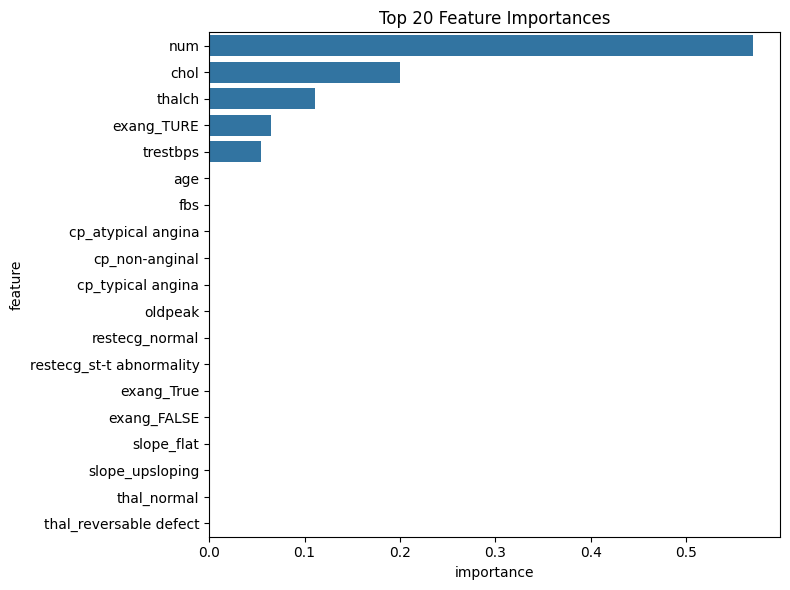

In [ ]:
# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=imp_df)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

## Task 7: Interview Question
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?



### 1. Common hyperparameters of Decision Tree models

Decision Trees have hyperparameters that control their growth and predictions. max_depth limits tree depth (shallow → simple, deep → complex).

* criterion ("gini", "entropy"): Measures split quality. Gini is faster; entropy may improve accuracy for imbalanced data but is slower.
* max_depth (e.g., 3, 5, None): Limits tree depth. Lower values prevent overfitting but may underfit; higher values capture more patterns but risk overfitting.
* min_samples_split (e.g., 2, 5, 10): Minimum samples to split a node. Higher values simplify trees, reducing overfitting; lower values increase complexity.
* min_samples_leaf (e.g., 1, 2, 4): Minimum samples per leaf. Higher values create robust leaves, improving generalization; lower values risk noise sensitivity.
* max_features (e.g., "sqrt", "log2", None): Features considered per split. Fewer features reduce overfitting but may miss patterns; all features increase complexity.

* class_weight ("balanced", None): Adjusts weights for imbalanced classes. "Balanced" improves performance on minority classes but may reduce overall accuracy.

###2. Difference between Label Encoding and One-Hot Encoding

Label Encoding:

Label encoding converts categories into numeric values by assigning each category a unique number. It’s simple and works well when the categories have a natural order, but it can create false ordinal relationships if used on unordered data.

One-Hot Encoding:

One-hot encoding creates separate binary columns for each category. Each value is represented as 1 in its category column and 0 in others. This avoids implying any order between categories but increases the number of features, especially for many categories.

##Conclusion:

The Decision Tree model identified patterns associated with heart disease. The initial model had 66% accuracy, 23% precision, 26% recall, 25% F1-score, and ROC-AUC 0.52, struggling with the minority class. After hyperparameter tuning and class balancing, recall improved to 76%, F1-score to 45%, precision to 31%, and ROC-AUC to 0.68, showing better detection of heart disease cases. Tree visualization and feature importance highlighted the most influential variables, making the model interpretable and actionable.